# 线性回归

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [2]:
# 参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# 数据
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape

In [4]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

In [5]:
pred = tf.add(tf.multiply(X, W), b)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch: 50 cost=[ 0.3247779  0.3247779] W=0.39959481358528137 b=-0.348480224609375
Epoch: 100 cost=[ 0.25815529  0.25815529] W=0.36503997445106506 b=-0.09144236892461777
Epoch: 150 cost=[ 0.21780683  0.21780683] W=0.3381664454936981 b=0.10845762491226196
Epoch: 200 cost=[ 0.1933616  0.1933616] W=0.3172667920589447 b=0.26392069458961487
Epoch: 250 cost=[ 0.17854416  0.17854416] W=0.30101296305656433 b=0.38482561707496643
Epoch: 300 cost=[ 0.16955718  0.16955718] W=0.288372278213501 b=0.4788537621498108
Epoch: 350 cost=[ 0.164102  0.164102] W=0.27854156494140625 b=0.5519804954528809
Epoch: 400 cost=[ 0.16078742  0.16078742] W=0.27089595794677734 b=0.6088525056838989
Epoch: 450 cost=[ 0.15877087  0.15877087] W=0.26495012640953064 b=0.6530810594558716
Epoch: 500 cost=[ 0.15754206  0.15754206] W=0.2603260576725006 b=0.6874772310256958
Epoch: 550 cost=[ 0.15679172  0.15679172] W=0.25672978162765503 b=0.7142283916473389
Epoch: 600 cost=[ 0.15633227  0.15633227] W=0.2539328634738922 b=0.7350336

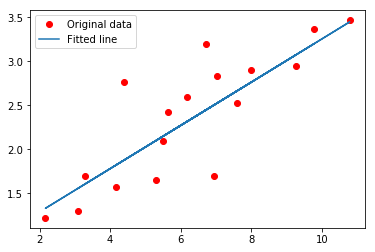

In [8]:
with tf.Session() as session:
    session.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            session.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch+1) % display_step == 0:
            c = session.run(cost, feed_dict={X: train_X, Y:train_Y})
            print(f'Epoch: {epoch+1} cost={c} W={session.run(W)} b={session.run(b)}')

    print("Optimization Finished!")
    training_cost = session.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", session.run(W), "b=", session.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, session.run(W) * train_X + session.run(b), label='Fitted line')
    plt.legend()
    plt.show()